In [53]:
import os
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score


In [8]:
ROOT_PATH = Path(Path(os.getcwd())/"../output/features")

In [37]:
train_nevus_df = pd.read_csv(ROOT_PATH/'nevus_features.csv',  header = None)
train_others_df = pd.read_csv(ROOT_PATH/'others_features.csv',  header = None)
val_nevus_df = pd.read_csv(ROOT_PATH/'nevus_val_features.csv',  header = None)
val_others_df = pd.read_csv(ROOT_PATH/'other_val_features.csv',  header = None)

In [15]:
train_nevus_df.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003922,0.010604,3.619345,0.032592,5.590849,12.895754,0.003922,0.009321,3.046806,0.026076,5.809914,8.475214,0.003922,0.008925,2.919211,0.024234,5.937940,7.611478,0.0
1,0.003922,0.023569,14.520333,0.145576,4.899479,219.925234,0.003922,0.023547,14.562177,0.145305,4.992963,220.780089,0.003922,0.023471,14.704948,0.144398,5.158188,223.748367,0.0
2,0.003922,0.012477,4.472047,0.043618,5.262965,20.309510,0.003922,0.011297,3.822801,0.036467,5.465146,13.823373,0.003922,0.010740,3.678852,0.033334,5.557813,12.902844,0.0
3,0.003922,0.009742,3.646792,0.028123,5.786762,13.100083,0.003922,0.007161,2.956125,0.016998,6.516997,8.400862,0.003922,0.006655,2.726460,0.015214,6.681399,6.528725,0.0
4,0.003922,0.012490,4.104263,0.043701,5.079543,16.740156,0.003922,0.009265,3.038064,0.025811,5.826128,8.379944,0.003922,0.008238,2.791942,0.021227,6.093673,6.961385,0.0


In [17]:
train_others_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003922,0.004861,0.865193,0.009946,6.817672,-0.849832,0.003922,0.004131,0.564074,0.008273,7.070611,-1.180128,0.003922,0.003838,0.298010,0.007678,7.148298,-1.604783,1.0
1,0.003922,0.009230,3.096170,0.025647,5.787048,8.905529,0.003922,0.006707,2.068650,0.015393,6.376746,3.511740,0.003922,0.004761,1.556754,0.009703,7.029784,1.564829,1.0
2,0.003922,0.011688,3.284795,0.038755,4.997920,9.753904,0.003922,0.009410,2.721379,0.026502,5.606540,6.323985,0.003922,0.007719,1.969590,0.019116,5.965637,2.450473,1.0
3,0.003922,0.010387,8.254683,0.031434,6.250835,90.435386,0.003922,0.009671,9.909116,0.027773,6.570487,120.515718,0.003922,0.009572,10.182135,0.027287,6.653482,125.126351,1.0
4,0.003922,0.009284,3.559758,0.025899,6.002939,13.238181,0.003922,0.007554,3.067488,0.018474,6.267581,13.082774,0.003922,0.006825,3.030769,0.015800,6.353581,16.139389,1.0


In [38]:
val_nevus_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003922,0.008955,3.036729,0.024369,5.970895,8.809644,0.003922,0.009070,3.312339,0.024898,6.036602,10.395075,0.003922,0.008211,2.939439,0.021114,6.205615,7.947573,0.0
1,0.003922,0.008114,2.144673,0.020711,5.857988,3.157120,0.003922,0.005611,1.709701,0.011951,6.667579,2.442610,0.003922,0.004810,0.909050,0.009821,6.820809,-0.490366,0.0
2,0.003922,0.005063,1.568771,0.010458,6.863649,2.232124,0.003922,0.003815,0.919806,0.007633,7.225917,0.494309,0.003922,0.003049,0.191098,0.006292,7.431818,-0.957772,0.0
3,0.003922,0.005976,3.289972,0.013029,6.940728,11.952681,0.003922,0.005626,2.633112,0.011992,6.963336,8.198197,0.003922,0.006116,2.918693,0.013459,6.854268,10.200674,0.0
4,0.003922,0.007650,2.647405,0.018845,6.362201,5.682692,0.003922,0.007615,2.764878,0.018708,6.337866,6.702797,0.003922,0.006469,2.126276,0.014593,6.581284,3.260561,0.0


In [39]:
val_others_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.003922,0.007850,4.556095,0.019637,6.414547,31.109284,0.003922,0.006338,6.545303,0.014166,6.851608,69.087324,0.003922,0.005706,8.703131,0.012223,7.196246,106.263721,1.0
1,0.003922,0.007854,2.038821,0.019651,5.925825,2.829284,0.003922,0.006241,1.378789,0.013853,6.376336,0.304768,0.003922,0.005612,1.175121,0.011952,6.593263,-0.194498,1.0
2,0.003922,0.030025,15.167776,0.233798,4.184426,234.649547,0.003922,0.029906,15.347240,0.231985,4.466858,238.448926,0.003922,0.029908,15.343867,0.232010,4.453076,238.379961,1.0
3,0.003922,0.012914,9.744288,0.046450,5.928354,112.840333,0.003922,0.012584,10.464235,0.044303,6.094039,125.411875,0.003922,0.012509,10.653917,0.043820,6.143031,128.630941,1.0
4,0.003922,0.008169,2.442559,0.020940,6.132542,4.433680,0.003922,0.005210,1.300321,0.010842,6.881268,0.169088,0.003922,0.004494,0.992251,0.009071,7.087972,-0.584139,1.0


In [43]:
# Concatenate the 'nevus' and 'others' dataframes
train_features = pd.concat([train_nevus_df, train_others_df], ignore_index=True)
val_features = pd.concat([val_nevus_df, val_others_df], ignore_index=True)

# Shuffle the dataset
train_features = train_features.sample(frac=1, random_state=42)
val_features = val_features.sample(frac=1, random_state=42)


In [44]:
X_train = train_features.iloc[:,:-1]
y_train = train_features.iloc[:,-1]

X_val = val_features.iloc[:,:-1]
y_val = val_features.iloc[:,-1]

X_val.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
15,0.003922,0.009337,2.971729,0.026152,5.734909,8.120023,0.003922,0.008203,2.788387,0.021080,6.081293,7.308689,0.003922,0.007912,2.531888,0.019885,6.155181,5.052750
9,0.003922,0.007729,2.009277,0.019157,6.041242,2.450953,0.003922,0.005975,1.242139,0.013026,6.456162,-0.115165,0.003922,0.006022,1.221655,0.013170,6.444165,-0.275862
115,0.003922,0.007979,3.701070,0.020158,6.421966,14.805061,0.003922,0.005926,2.889135,0.012876,6.879653,9.515856,0.003922,0.005097,2.784194,0.010545,7.105360,10.596337
78,0.003922,0.008090,2.387136,0.020610,5.901416,4.947028,0.003922,0.005008,1.089267,0.010316,6.772326,0.162823,0.003922,0.003892,0.389755,0.007785,7.114799,-1.266208
66,0.003922,0.008780,2.192055,0.023580,5.586097,3.456172,0.003922,0.007167,1.740630,0.017020,6.098207,1.507255,0.003922,0.006512,1.551747,0.014736,6.309504,0.987575


In [45]:
# Standardizing the training data (mean = 0, std = 1)
scaler = StandardScaler()
X_train_normalized = pd.DataFrame(scaler.fit_transform(X_train))
X_val_normalized = pd.DataFrame(scaler.transform(X_val))

In [46]:
# Encoding the label column
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_val_encoded = encoder.transform(y_val)

In [47]:
parameters = {'kernel':('linear', 'rbf', 'sigmoid', 'poly'), 'C':[0.1, 1, 10, 100, 1000], 'gamma':[0.001, 0.0001]}
svc = SVC()

# Create a GridSearchCV object with a classifier and the parameter grid
grid_search = GridSearchCV(estimator=svc, param_grid=parameters, cv=10, verbose=10)

# Fit the grid search to your training data
grid_search.fit(X_train_normalized, y_train_encoded)

# Get the best hyperparameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV 1/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 1/10; 1/40] END C=0.1, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 2/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 2/10; 1/40] END C=0.1, gamma=0.001, kernel=linear;, score=0.571 total time=   0.0s
[CV 3/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 3/10; 1/40] END C=0.1, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 4/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 4/10; 1/40] END C=0.1, gamma=0.001, kernel=linear;, score=0.714 total time=   0.0s
[CV 5/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 5/10; 1/40] END C=0.1, gamma=0.001, kernel=linear;, score=0.650 total time=   0.0s
[CV 6/10; 1/40] START C=0.1, gamma=0.001, kernel=linear.........................
[CV 6/10; 1/40] 

In [48]:
best_params

{'C': 100, 'gamma': 0.001, 'kernel': 'linear'}

In [49]:
y_pred = best_model.predict(X_val_normalized)
print(y_pred)

[0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 0 1 1
 0 1 1 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 1 1 0
 1 0 1 1 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0
 0 1 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0
 1 1 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0 0 1]


### Model evaluation

In [50]:
fpr, tpr, _ = roc_curve(y_val_encoded, y_pred)
roc_auc = auc(fpr, tpr)

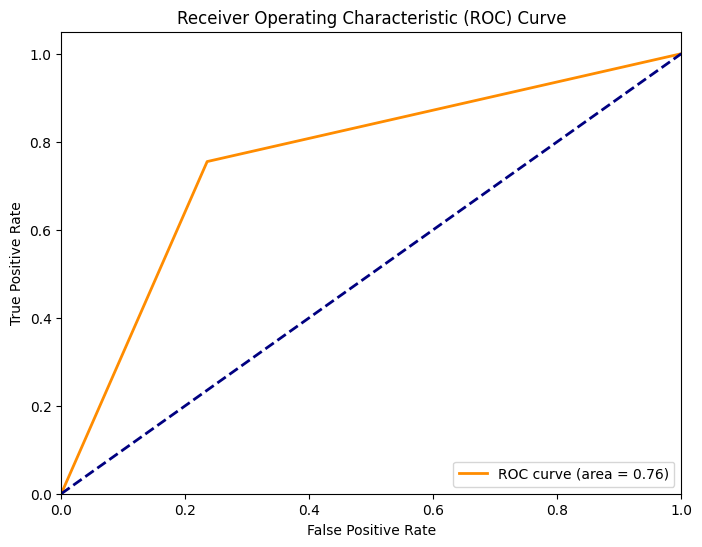

In [52]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [54]:
# Calculate accuracy
accuracy = accuracy_score(y_val_encoded, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7598039215686274
